<a href="https://colab.research.google.com/github/arturtoshev/SciML22-23/blob/master/exercise/1_linReg_logReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear regression and logistic regression

This tutorial shows how to apply linear regression and logistic regression using PyTorch. 

In [ ]:
import numpy as np
import pandas as pd

# visualization libraries
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# pytorch dependencies
import torch
from torch.autograd import Variable
# import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


## 1.1 Linear Regression

### Problem setting
- Given: given is a set of measurement pairs $\left\{x^{(i)}, y^{\text {(i)}}\right\}_{i=1,...m}$ with $x \in \mathbb{R}^{n}$ and $y \in \mathbb{R}$
- Question:  if a give you a novel $x$, what would be your best guess about its corresponding $y$?
- Linear regression assumption: 
 $$y \approx h(x)=\vartheta^{\top} x = \vartheta_0 + \vartheta_1 \cdot x_1 + ... \vartheta_n \cdot x_n$$

> Note: $\vartheta_0$ is the so called bias term and you can read more about it in the "Analytical Solution" subsection below.

<br>

 In matrix form this becomes:
 $$Y \approx X \vartheta$$

 <br> 

 As a reminder, we can interpret the linear dependence assumption as a Maximum Likelihood Estimation of the "true" underlying linear dependence between inputs $x$ and outputs $y$ with added Gaussian noise on top:

 $$Y = X \vartheta + \epsilon, \quad \text{with} \; \epsilon \sim \mathcal{N}(0,\sigma^2), \; \epsilon \in \mathbb{R}^n$$

### 1.1.1 Artificial Dataset

In [ ]:
a = 3
b = 2
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = a + b*x + noise

For convenience, we use Pandas to store our values in the dataframe and then access them out of the dataframe - this is a highly common workflow for machine learning datasets. A normal split would be a Pandas dataframe for labels, serial data etc. and images in the same folder, which can then be described with the PyTorch DataSet API.

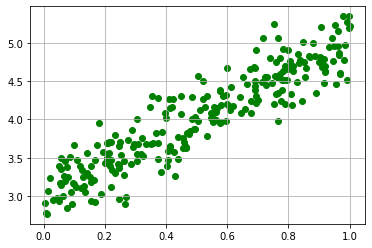

In [ ]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y

plt.scatter(df['x'], df['y'], color='green')
plt.grid()
plt.show()

### 1.1.2 Gradient Descent Optimization

In the lecture we saw that for an iterative optimization process, e.g. gradient descent, we need to define a measure $J$, which capture the error. This quantity is what we essentially minimize through repeated updates of the parameters $\vartheta$. One very common **error function** $J$, a.k.a. **loss** or as PyTorch calls it **criterion**, is the mean squared error (MSE), a.k.a. squared L2 loss:

$$J(\vartheta)=\frac{1}{2} \sum_{i=1}^{m}\left(h\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

In [ ]:
# Reshape the input variables
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

# Definition of the linear regression model
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

learning_rate = 0.01
epochs = 100

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Test the performance of the model **before** we do any optimization:

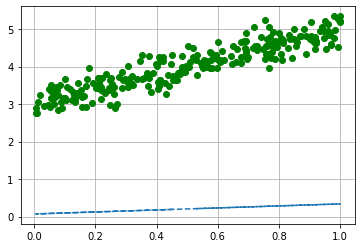

In [ ]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data')
plt.plot(x_train, predicted, '--', label='Predictions')
plt.grid()
plt.show()

The model is currently initialized with some random numbers. These are:


In [ ]:
for name, param in model.named_parameters():
  print(name, ": ", param.data)
  # bias = \vartheta_0
  # weight = \vartheta_1:n

linear.weight :  tensor([[0.2690]])
linear.bias :  tensor([0.0701])


In [ ]:
for epoch in range(epochs):

    inputs = Variable(torch.from_numpy(x_train))
    y_train_var = Variable(torch.from_numpy(y_train))

    # Clear gradient buffer
    optimizer.zero_grad()

    # Output from model given the inputs
    y_pred = model(inputs)

    # Get loss for the model's prediction
    loss = criterion(y_pred, y_train_var)
    loss.backward()

    # Update the model's parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 14.930853843688965
epoch 1, loss 14.180635452270508
epoch 2, loss 13.468267440795898
epoch 3, loss 12.791839599609375
epoch 4, loss 12.149541854858398
epoch 5, loss 11.539649963378906
epoch 6, loss 10.960528373718262
epoch 7, loss 10.410627365112305
epoch 8, loss 9.888469696044922
epoch 9, loss 9.392656326293945
epoch 10, loss 8.921858787536621
epoch 11, loss 8.474814414978027
epoch 12, loss 8.050324440002441
epoch 13, loss 7.647252559661865
epoch 14, loss 7.264516830444336
epoch 15, loss 6.901090621948242
epoch 16, loss 6.556001663208008
epoch 17, loss 6.228323459625244
epoch 18, loss 5.917176723480225
epoch 19, loss 5.621729373931885
epoch 20, loss 5.341187477111816
epoch 21, loss 5.074800491333008
epoch 22, loss 4.8218536376953125
epoch 23, loss 4.581668376922607
epoch 24, loss 4.353601455688477
epoch 25, loss 4.1370415687561035
epoch 26, loss 3.9314072132110596
epoch 27, loss 3.736147880554199
epoch 28, loss 3.5507407188415527
epoch 29, loss 3.374687433242798
epoch 30

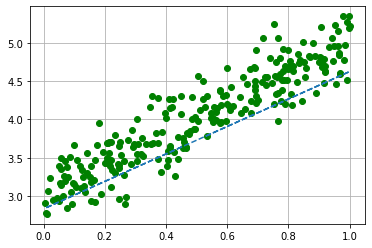

linear.weight :  tensor([[1.7906]])
linear.bias :  tensor([2.8342])


In [ ]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data')
plt.plot(x_train, predicted, '--', label='Predictions')
plt.grid()
plt.show()

for name, param in model.named_parameters():
  print(name, ": ", param.data)

### 1.1.3 Stochastic Gradient Descent
We can run the same optimization, but on chunks of the data, a.k.a. minibatches. This variant of gradient descent is then called Stochastic Gradient Descent due to the stochastic nature of optimizing $\vartheta$ on subsets of the data.

In [ ]:
batch_size = 32
num_batches = len(x) // batch_size
batch_idxs = np.arange(num_batches)

for epoch in range(epochs):
    np.random.shuffle(batch_idxs)

    for i in batch_idxs:
        # slice out the portion of x and y, which corresponds to the batch i
        x_batch = x_train[batch_size*i:batch_size*(i+1)]
        y_batch = y_train[batch_size*i:batch_size*(i+1)]
        
        inputs = Variable(torch.from_numpy(x_batch))
        y_train_var = Variable(torch.from_numpy(y_batch))

        # Clear gradient buffer
        optimizer.zero_grad()

        # Output from model given the inputs
        y_pred = model(inputs)

        # Get loss for the model's prediction
        loss = criterion(y_pred, y_train_var)
        loss.backward()

        # Update the model's parameters
        optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.1341165155172348
epoch 1, loss 0.11462900042533875
epoch 2, loss 0.06527148187160492
epoch 3, loss 0.09232383966445923
epoch 4, loss 0.06726282835006714
epoch 5, loss 0.051201459020376205
epoch 6, loss 0.06898342818021774
epoch 7, loss 0.05608513951301575
epoch 8, loss 0.05525144189596176
epoch 9, loss 0.048698026686906815
epoch 10, loss 0.05908149108290672
epoch 11, loss 0.04924646019935608
epoch 12, loss 0.05677725374698639
epoch 13, loss 0.04949120804667473
epoch 14, loss 0.07184114307165146
epoch 15, loss 0.09527931362390518
epoch 16, loss 0.05539153143763542
epoch 17, loss 0.07136432826519012
epoch 18, loss 0.0942763090133667
epoch 19, loss 0.04977710172533989
epoch 20, loss 0.053703874349594116
epoch 21, loss 0.05027631297707558
epoch 22, loss 0.062108077108860016
epoch 23, loss 0.09364777058362961
epoch 24, loss 0.05040581151843071
epoch 25, loss 0.05419829115271568
epoch 26, loss 0.04994799196720123
epoch 27, loss 0.05491425096988678
epoch 28, loss 0.05422470718

Test the performance of the model **after** optimization:

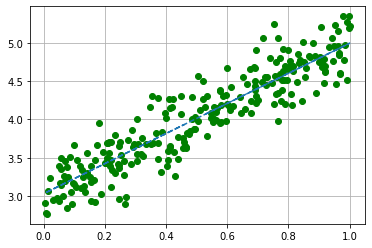

linear.weight :  tensor([[1.9625]])
linear.bias :  tensor([3.0317])


In [ ]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data')
plt.plot(x_train, predicted, '--', label='Predictions')
plt.grid()
plt.show()

for name, param in model.named_parameters():
  print(name, ": ", param.data)

### 1.1.4 Analytical Solution

As we saw in the lecture, the linear regression problem is one of the very few machine learning algorithms which admits an analytical solution. This reads

$$
\quad\vartheta=\left(X^{\top}X\right)^{-1}X^{\top}Y
$$

> Caution: To get the so called bias term $\vartheta_0$, we need to extend $X$ to 

$$X_{m \times n}=\left[\begin{array}{c}x^{(1) \top }\\ \vdots \\ x^{(m) \top} \\ \mathbf{1}^{\top}\end{array}\right],$$

otherwise we assume that the line we are fitting crosses $y$ at $x=0$. The PyTorch model we saw before automatically defines a bias term and optimizes it to the data.

In [ ]:
# extended x vector
x_ext = np.ones((x.shape[0], 2))
x_ext[:,0] = x

In [ ]:
xtx = x_ext.T.dot(x_ext)
xtx_inv = np.linalg.inv(xtx)
xtx_inv_xt = xtx_inv.dot(x_ext.T)
theta = xtx_inv_xt.dot(y)

print("theta =", theta)

theta = [1.98897946 3.01789534]


### 1.1.5 Exercise

Apply linear regression on the housing price dataset provided [here](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction) using:
1. Gradien Descent
2. Stochastic Gradient Descent
3. Analytical Solution

> Note: there won't be a solution to this exercise. It is only provided as practice material.

> Hint: You might find [this](https://www.kaggle.com/code/aminizahra/linear-regression) helpful.


In [ ]:
####################
# TODO


####################

## 1.2 Logistic Regression

#### Problem setting
- Given: given is a set of measurement pairs $\left\{x^{(i)}, y^{\text {(i)}}\right\}_{i=1,...m}$ with $x \in \mathbb{R}^{n}$ and $y \in \{0,1\}$
- Question:  if a give you a novel $x$, what would be your best guess about its corresponding $y$? Up until here, the only difference to linear regression is in the domain of $y$.
- Logistic regression assumption: Instead of asking directly whether the class is 0 or 1, we model the ***probability of the class being 1*** with $h$:
 $$h(x) = \varphi \left( \vartheta^{\top} x \right) = \frac{1}{1+e^{-\vartheta^{\top} x}} = \frac{1}{1+e^{-(\vartheta_0 + \vartheta_1 \cdot x_1 ... + \vartheta_n \cdot x_n)}} $$

Sigmoid function:

<div style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png" alt="drawing" width="400"/>
</div>


 > Note: Unfortunately, even this very simple classification model does not have an analytical solution, thus we use gradient-based optimization.

 Reference: this implementation is a simplification of the example given [here](https://blog.jovian.ai/torch-logistic-regression-on-iris-dataset-d966b23339da).

### 1.2.1 Iris Dataset

In [ ]:
# get iris dataset
from urllib.request import urlretrieve
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df0 = pd.read_csv(iris, sep=',')

# name columns
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df0.columns = attributes

# add species index
species = list(df0["class"].unique())
df0["class_idx"] = df0["class"].apply(species.index)

print(df0.head())
print("Count occurence of each class:")
print(df0["class"].value_counts())

   sepal_length  sepal_width  petal_length  petal_width        class  \
0           4.9          3.0           1.4          0.2  Iris-setosa   
1           4.7          3.2           1.3          0.2  Iris-setosa   
2           4.6          3.1           1.5          0.2  Iris-setosa   
3           5.0          3.6           1.4          0.2  Iris-setosa   
4           5.4          3.9           1.7          0.4  Iris-setosa   

   class_idx  
0          0  
1          0  
2          0  
3          0  
4          0  
Count occurence of each class:
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64


Your can learn more about this well established dataset [here](https://archive.ics.uci.edu/ml/datasets/Iris). In essence, we see measurements of 4 different features and the corresponding type of iris plant out of ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']. We transform this problem to a logistic regression problem by looking only at two of the classes, which we denote with [0,1]. In addition, we consider only two of the features to make visualization possible.

In [ ]:
df = df0[["petal_length", "petal_width", "class_idx"]]
df = df[df["class_idx"] != 0]
df["class_idx"] = df["class_idx"] - 1

print(df["class_idx"].value_counts())
print(df)

0    50
1    50
Name: class_idx, dtype: int64
     petal_length  petal_width  class_idx
49            4.7          1.4          0
50            4.5          1.5          0
51            4.9          1.5          0
52            4.0          1.3          0
53            4.6          1.5          0
..            ...          ...        ...
144           5.2          2.3          1
145           5.0          1.9          1
146           5.2          2.0          1
147           5.4          2.3          1
148           5.1          1.8          1

[100 rows x 3 columns]


In [ ]:
fig = px.scatter_3d(df[["petal_length","petal_width","class_idx"]],
                    x = 'petal_length',
                    y = 'petal_width',
                    z = 'class_idx',
                    color = 'class_idx',
                    opacity = 0.9)

fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))

### 1.2.2 Preprocess and Dataloader

In [ ]:
input_columns = torch.from_numpy(df[['petal_length', 'petal_width']].to_numpy()).type(torch.float32)
output_columns = torch.from_numpy(df['class_idx'].to_numpy()).type(torch.float32)
output_columns = output_columns.reshape(-1, 1)

print("Input columns: ", input_columns.shape, input_columns.dtype)
print("Output columns: ", output_columns.shape, output_columns.dtype)

Input columns:  torch.Size([100, 2]) torch.float32
Output columns:  torch.Size([100, 1]) torch.float32


In [ ]:
# set hyperparameters
batch_size = 25

# create a PyTorch data object used by DataLoader
data = TensorDataset(input_columns, output_columns)

# define data loader which shuffles the data
train_loader = DataLoader(data, batch_size, shuffle = True)

# one batch of training data would look like this:
for x in train_loader:
    print (x, x[0].shape, x[0].dtype)
    break


[tensor([[5.8000, 2.2000],
        [5.6000, 1.4000],
        [4.4000, 1.4000],
        [5.1000, 1.9000],
        [5.7000, 2.5000],
        [4.4000, 1.3000],
        [5.8000, 1.6000],
        [4.8000, 1.8000],
        [5.1000, 2.0000],
        [4.9000, 1.8000],
        [5.0000, 2.0000],
        [4.7000, 1.4000],
        [6.7000, 2.0000],
        [4.9000, 1.5000],
        [5.5000, 2.1000],
        [6.9000, 2.3000],
        [4.7000, 1.6000],
        [5.8000, 1.8000],
        [4.9000, 1.5000],
        [3.0000, 1.1000],
        [6.0000, 1.8000],
        [5.7000, 2.1000],
        [5.6000, 2.4000],
        [3.9000, 1.2000],
        [3.3000, 1.0000]]), tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.

### 1.2.3 Model and Training

In [ ]:
# This is the core part of the logistic regression. Here we define the linear 
# transformation of x and afterwards pushing it through sigmoid

# Define model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear1(x))
        return outputs

The [`torch.nn.BCELoss(h(x),y)`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) function implements $-\log p(y|x;\vartheta) = - \log \left(h^y(x)(1-h(x))^{1-y}\right)$. Maximizing the probability is the same as minimizing this loss.

In [ ]:
# set hyperparameters
learning_rate = 1.0
epochs = 1000

input_dim = 2
output_dim = 1

# instantiating the model
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):
    for x, y in train_loader:

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

    print("Epoch: {}. Loss: {}.".format(epoch + 1, loss.item()))

Epoch: 1. Loss: 4.938625812530518.
Epoch: 2. Loss: 7.965576171875.
Epoch: 3. Loss: 7.535805702209473.
Epoch: 4. Loss: 0.5870006084442139.
Epoch: 5. Loss: 4.353271961212158.
Epoch: 6. Loss: 3.7897255420684814.
Epoch: 7. Loss: 1.2760947942733765.
Epoch: 8. Loss: 0.7826815247535706.
Epoch: 9. Loss: 1.2233582735061646.
Epoch: 10. Loss: 2.7424991130828857.
Epoch: 11. Loss: 4.833599090576172.
Epoch: 12. Loss: 0.5743933320045471.
Epoch: 13. Loss: 4.14581298828125.
Epoch: 14. Loss: 4.302636623382568.
Epoch: 15. Loss: 2.0549697875976562.
Epoch: 16. Loss: 0.8796350955963135.
Epoch: 17. Loss: 1.1095879077911377.
Epoch: 18. Loss: 1.9364012479782104.
Epoch: 19. Loss: 5.856472015380859.
Epoch: 20. Loss: 1.4038196802139282.
Epoch: 21. Loss: 0.7667605876922607.
Epoch: 22. Loss: 0.3182474374771118.
Epoch: 23. Loss: 1.3136448860168457.
Epoch: 24. Loss: 1.2768386602401733.
Epoch: 25. Loss: 2.9474337100982666.
Epoch: 26. Loss: 1.9164294004440308.
Epoch: 27. Loss: 2.1767423152923584.
Epoch: 28. Loss: 2.005

In [ ]:
for name, param in model.named_parameters():
  print(name, ": ", param.data)
# theta_0 = bias, theta_1:2 = weight

# Interpretation:
# linear1.weight :  tensor([[3.4394, 8.9426]]) 
# -> both parameters are positively correlated, i.e. if any of them increase, 
# the probability of having class "1" increases
# linear1.bias :  tensor([-31.8393])
# -> offset prediction by -31.8, which conteracts the large positive weights

linear1.weight :  tensor([[3.4982, 8.9113]])
linear1.bias :  tensor([-31.5534])


In [ ]:
x = np.linspace(input_columns[:,0].min(), input_columns[:,0].max(), 10)
y = np.linspace(input_columns[:,1].min(), input_columns[:,1].max(), 10)
xx, yy = np.meshgrid(x,y)
X, Y = xx.flatten(), yy.flatten()
XY = np.vstack([X,Y]).T

with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(XY).type(torch.float32))).data.numpy()

predicted = predicted.squeeze()
predicted = predicted.reshape(10,10)

In [ ]:
fig = go.Figure(data=[
    go.Surface(
        contours = {
            "z": {"show": True, "start": 0.5, "end": 0.5001, "size": 0.05}
        },
        x = x,
        y = y,
        z = predicted,
        opacity=0.5
    ),
    go.Scatter3d(
        x = df["petal_length"],
        y = df['petal_width'],
        z = df['class_idx'],
        mode='markers',
        marker=dict(
            color=df['class_idx'],
            opacity=0.99,
        )
    )
])

fig.update_layout(margin = dict(l=0, r=0, b=0, t=0),
                  scene = {
                      "camera_eye": {"x":7, "y":-3., "z":0.5},
                      "aspectratio": {"x":8, "y":3, "z":2}
                      }
                  )
fig.show()

### 1.2.4 Exercise

Apply logistic regression to the [MNIST handwritten digits](http://yann.lecun.com/exdb/mnist/) dataset. Main differences to the Iris dataset:
- the inputs are images of shape [28,28,1] and need to be flattened out
- the output here is not the probability of being in one class (as in the problem we discusses here), but 10 classes and the probability of being in each of them.

> Hint: You might find help [here](https://towardsdatascience.com/logistic-regression-on-mnist-with-pytorch-b048327f8d19).

In [ ]:
####################
# TODO


####################